In [2]:
##Experiment 1: Free Induction Decay
    # FID is the magnetization created from a 90 deg pulse, therefore we want to find 
    # the magnetic field gradient (1/B)(dB/dx) --> find time constant tau with A_o and A(1/2)
    # A(1/2)=A_o*e^(-t/tau) where t is the delay time and A_o is MAX amplitude?

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

magnetic field gradient: [2.97473676 1.48736838 0.99157892 0.74368419 0.59494735 0.49578946
 0.42496239 0.37184209 0.33052631 0.29747368 0.27043061 0.24789473
 0.2288259  0.2124812  0.19831578 0.18592105 0.17498452 0.16526315
 0.15656509 0.14873684 0.14165413]
decay time constant: [ 0.69314718  1.38629436  2.07944154  2.77258872  3.4657359   4.15888308
  4.85203026  5.54517744  6.23832463  6.93147181  7.62461899  8.31776617
  9.01091335  9.70406053 10.39720771 11.09035489 11.78350207 12.47664925
 13.16979643 13.86294361 14.55609079]


<ErrorbarContainer object of 3 artists>

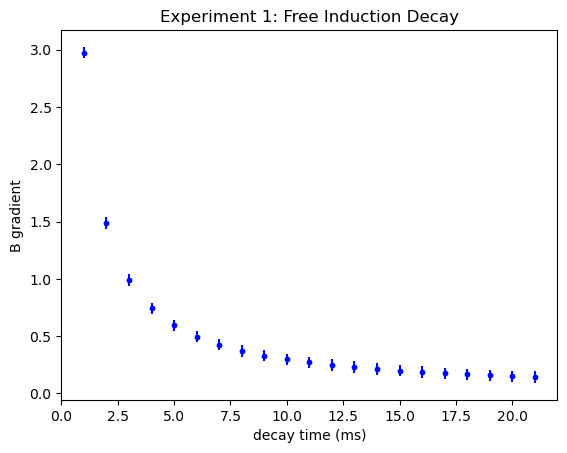

In [4]:
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]) #in ms

A_o = np.array([1.42, 1.32, 1.22, 1.12, 1.04, 0.96, 0.88, 0.78, 0.72, 0.64, 0.58, 0.50, 0.44,
      0.40, 0.34, 0.28, 0.22, 0.18, 0.12, 0.08, 0.06]) #Volts

# at t=0, A_o = 1.52

w = 2*np.pi*(15.43747) #MHz

x = (0.005) #converted mm to m

# to find (1/B)(dB/dx). why do we need A_o?

A_half = (1/2)*A_o

# rearrange equation from above for tau

tau = np.log(1/2)*(-t)

gradient = 1/(w*x*tau) # w=angular freq, t=decay time, x=sample size,
                    # the units become 1/(MHz*m*ms)

print("magnetic field gradient:", gradient)
print("decay time constant:", tau)


# plt.scatter(t, A_o)
plt.scatter(t, gradient, marker='.')
plt.xlabel("decay time (ms)")
plt.ylabel("B gradient")
plt.title("Experiment 1: Free Induction Decay")

#error bars
noise_std = 0.05
error = noise_std*np.ones(21)
plt.errorbar(t, gradient, yerr=error, fmt=".", color='b')

In [5]:
# this agrees with the lab: "the signal will diminish quickly with time,
# owing to the dephasing arising ffrom the magnetic field inhomogeneities"


chi-square: 361.38576760893966
degrees of freedom: 29
reduced chi-square: 12.461578193411713


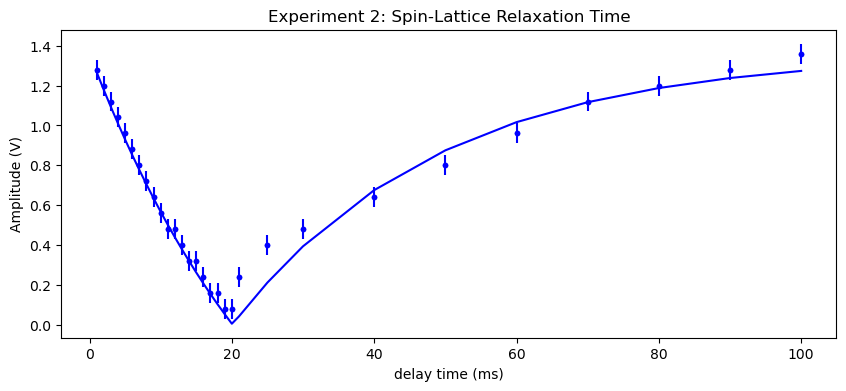

In [23]:
##Experiment 2: Spin-Lattice Relaxation Time (T_1)
    #T_1 is "the time that is takes for the spins to adjust to their new magnetic environment"
    
A_o = 1.36 #Volts, for freq = 15.44736 MHz

t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
              17, 18, 19, 20, 21, 25, 30, 40, 50, 60, 70, 80, 90, 100]) #ms

A = np.array([1.28, 1.20, 1.12, 1.04, 0.96, 0.88, 0.80, 0.72, 0.64, 0.56, 0.48, 0.48, 0.40,
             0.32, 0.32, 0.24, 0.16, 0.16, 0.08, 0.08, 0.24, 0.40, 0.48, 0.64, 0.80, 0.96,
             1.12, 1.20, 1.28, 1.36])

# T_1 must fit for the eq. A_t = A_o * np.abs(2 * np.exp(-t/T_1) - 1)

# T_1 = 1/(np.log(np.abs(A/A_o)*(1/2) + 1) * -t)

# plt.subplot(1, 2, 1)
plt.figure(figsize=(10,4))
plt.scatter(t, A, marker='.', color='b')
plt.xlabel("delay time (ms)")
plt.ylabel("Amplitude (V)")
plt.title("Experiment 2: Spin-Lattice Relaxation Time")
noise_std = 0.05
error = noise_std*np.ones(30)
plt.errorbar(t, A, yerr=error, fmt=".", color='b')


# plt.subplot(1, 2, 2)
# plt.plot(t, np.abs(T_1), marker='.')
# plt.xlabel("delay time (ms)")
# plt.ylabel("Spin-Relaxation Time (T_1)")

A_t = A_o * np.abs(2 * np.exp(-t/29) - 1)
plt.plot(t, A_t, color='b')
# T_1 at 29ms gives the closest plotline to our data

dof= len(t) - 1
chisq=np.sum((np.polyval(p,t)-A)**2)
print("chi-square:", chisq)
print("degrees of freedom:", dof)
print("reduced chi-square:", chisq/dof)

chi-square: 18.51243085644463
degrees of freedom: 9
reduced chi-square: 2.056936761827181


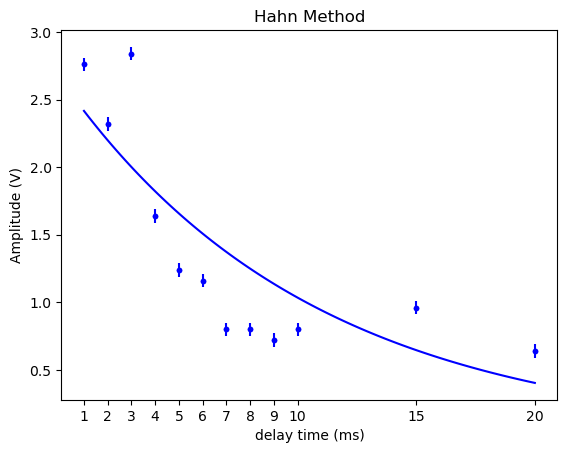

In [22]:
## Experiment 3: Spin-Spin Relaxation Time (T_2)
    # T_2 is "the time that it would have dissipated in a perfectly homogenous [B] field"
    
    # Hahn Method
t_half = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20 ]) # ms

Amp = np.array([2.76, 2.32, 2.84, 1.64, 1.24, 1.16, 0.800, 0.800, 0.720, 0.800, 0.960, 0.640]) #Volts

plt.scatter(t_half, Amp, color='b', marker='.')
plt.xticks(t_half)
plt.title("Hahn Method")
plt.xlabel("delay time (ms)")
plt.ylabel("Amplitude (V)")

#fit to exponential equation
p = np.polyfit(t_half, np.log(Amp), 1, w=np.sqrt(Amp))
a = np.exp(p[1])
b = p[0]
half_fit = np.linspace(np.min(t_half), np.max(t_half), 100)
Amp_fit = a*np.exp(b*half_fit)
plt.plot(half_fit, Amp_fit, color='b')

noise_std = 0.05
error = noise_std*np.ones(12)
plt.errorbar(t_half, Amp, yerr=error, fmt=".", color='b')

dof= len(t) - 1
chisq=np.sum((np.polyval(p,t_half)-Amp)**2)
print("chi-square:", chisq)
print("degrees of freedom:", dof)
print("reduced chi-square:", chisq/dof)

chi-square: 11.915630924488596
degrees of freedom: 9
reduced chi-square: 1.323958991609844


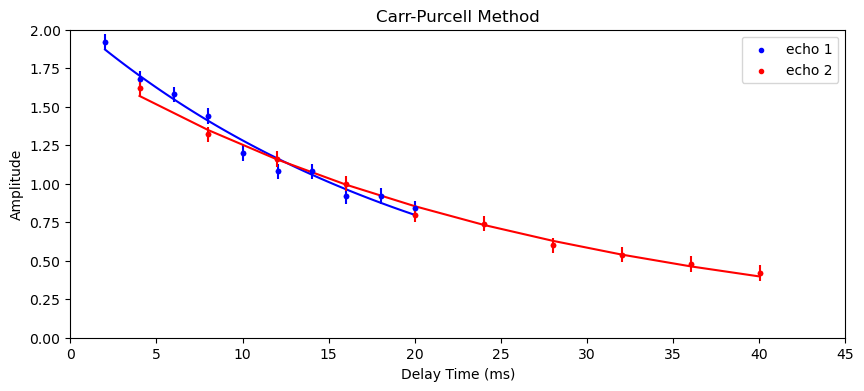

In [30]:
    # Carr-Purcell Method
t = np.array([2.020, 4.020, 6.020, 8.020, 10.00, 12.04, 14.02, 16.00, 18.02, 20.02]) #ms

echo_1 = np.array([1.92, 1.68, 1.58, 1.44, 1.20, 1.08, 1.08, 0.920, 0.920, 0.840]) #Volts

echo_2 = np.array([1.62, 1.32, 1.16, 1.00, 0.800, 0.740, 0.600, 0.540, 0.480, 0.420])

double_t = np.array([4.020, 8.020, 12.020, 16.020, 20.00, 24.02, 28.00, 32.02, 36.02, 40.02])

plt.figure(figsize=(10,4))

#plt.subplot(1,2,1)
plt.scatter(t, echo_1, color='b', marker='.', label="echo 1")

plt.xlim(0,45)
plt.ylim(0,2)

p = np.polyfit(t, np.log(echo_1), 1, w=np.sqrt(echo_1))
a = np.exp(p[1])
b = p[0]
t_fit = np.linspace(np.min(t), np.max(t), 100)
echo1_fit = a*np.exp(b*t_fit)
plt.plot(t_fit, echo1_fit, color='b')
noise_std = 0.05
error = noise_std*np.ones(10)
plt.errorbar(t, echo_1, yerr=error, fmt=".", color='b')

#plt.subplot(1,2,2)
plt.scatter(double_t, echo_2, color='r', marker='.', label="echo 2")
plt.title("Carr-Purcell Method")

p = np.polyfit(double_t, np.log(echo_2), 1, w=np.sqrt(echo_2))
a = np.exp(p[1])
b = p[0]
double_fit = np.linspace(np.min(double_t), np.max(double_t), 10)
echo2_fit = a*np.exp(b*double_t)
plt.plot(double_fit, echo2_fit, color='r')
noise_std = 0.05
error = noise_std*np.ones(10)
plt.errorbar(double_t, echo_2, yerr=error, fmt=".", color='r')

plt.xlim(0,45)
plt.ylim(0,2)
plt.xlabel("Delay Time (ms)")
plt.ylabel("Amplitude")
plt.legend()

# chi-square test
dof= len(t) - 1
chisq=np.sum((np.polyval(p,t)-echo_1)**2)
print("chi-square:", chisq)
print("degrees of freedom:", dof)
print("reduced chi-square:", chisq/dof)

chi-square: 10.260680210953277
degrees of freedom: 9
reduced chi-square: 1.1400755789948085


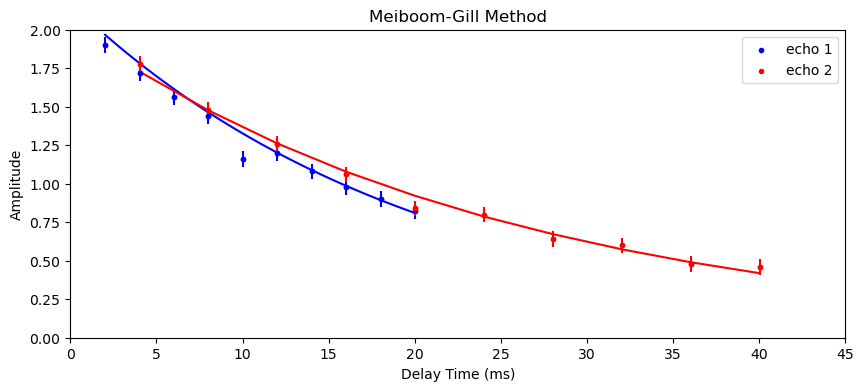

In [32]:
    # Meiboom-Gill Method
t = np.array([2.020, 4.020, 6.020, 8.020, 10.00, 12.02, 14.02, 16.02, 18.02, 20.02])

double_t = np.array([4.020, 8.020, 12.020, 16.020, 20.00, 24.02, 28.00, 32.02, 36.04, 40.02])

echo_1 = np.array([1.90, 1.72, 1.56, 1.44, 1.16, 1.20, 1.08, 0.980, 0.900, 0.820])

echo_2 = np.array([1.78, 1.48, 1.26, 1.06, 0.840, 0.800, 0.640, 0.600, 0.480, 0.460])

plt.figure(figsize=(10,4))
#plt.subplot(1,2,1)
plt.scatter(t, echo_1, color='b', marker='.', label="echo 1")

p = np.polyfit(t, np.log(echo_1), 1, w=np.sqrt(echo_1))
a = np.exp(p[1])
b = p[0]
t_fit = np.linspace(np.min(t), np.max(t), 100)
echo1_fit = a*np.exp(b*half_fit)
plt.plot(t_fit, echo1_fit, color='b')
noise_std = 0.05
error = noise_std*np.ones(10)
plt.errorbar(t, echo_1, yerr=error, fmt=".", color='b')

#plt.subplot(1,2,2)
plt.scatter(double_t, echo_2, color='r', marker='.', label="echo 2")

p = np.polyfit(double_t, np.log(echo_2), 1, w=np.sqrt(echo_2))
a = np.exp(p[1])
b = p[0]
double_fit = np.linspace(np.min(double_t), np.max(double_t), 10)
echo2_fit = a*np.exp(b*double_t)
plt.plot(double_fit, echo2_fit, color='r')
noise_std = 0.05
error = noise_std*np.ones(10)
plt.errorbar(double_t, echo_2, yerr=error, fmt=".", color='r')

plt.xlim(0,45)
plt.ylim(0,2)
plt.xlabel("Delay Time (ms)")
plt.ylabel("Amplitude")
plt.title("Meiboom-Gill Method")
plt.legend()

#chi-square test
#degrees of freedom (dof)
dof= len(t) - 1
chisq=np.sum((np.polyval(p,t)-echo_1)**2)
print("chi-square:", chisq)
print("degrees of freedom:", dof)
print("reduced chi-square:", chisq/dof)